The customer analysis, customer segmentation was made below. I tried to understand who are our "alive", active users and who are ready to buy. The next step was  customer segmentation and labeling our customers. In the end I tried to crete model to predict  who is who based on the first day data.

 Let's think how we can understand whether customer is highly involved in the game. First of all, he spend a lot of time in the game. 
 1. Lets analyze how time spend in the game changes with a days.
 2. lets check how the winning  effects time spent in the game
 3. lets check whether spending soft/hard money results in making a purchase 
 4. Is there any difference between game modes for customers involving. And if there correlation between customers behavior and which mode customer choose to play first.
 5. what are main groups of customer we have.
 
 
 



# Data Exploration

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.utils import resample


In [2]:
# Load your dataset into a DataFrame
df = pd.read_csv("/Users/yelyzaveta.yaroshchuk/Documents/Projects/customer_segmentation/data.csv", 
                parse_dates=['Regdate', 'date'], dtype={'userid': 'str' }
                )

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print out the first five rows
df.head(2)

Number of rows and columns: (32464, 27)


,userid,Regdate,date,TotalSessionsDuration,TotalPurchases,StartLevel,EndLevel,StartExperience,EndExperience,StartEnergy,...,SpentHardCurrency,BattlesNumber_Mode1,BattlesNumber_Mode2,BattlesNumber_Mode3,BattlesNumber_Mode4,BattlesWonNumber_Mode1,BattlesWonNumber_Mode2,BattlesWonNumber_Mode3,BattlesWonNumber_Mode4,TotalCombatPower
0,121949033751398161,2021-07-04,2021-07-04,124,0.0,1,1,0.0,0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,121949033751384161,2021-07-04,2021-07-04,0,0.0,1,1,0.0,0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
print('Number of unique users: ',len(df.userid.unique()))

Number of unique users:  11436


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32464 entries, 0 to 32463
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   userid                  32464 non-null  object        
 1   Regdate                 32464 non-null  datetime64[ns]
 2   date                    32464 non-null  datetime64[ns]
 3   TotalSessionsDuration   32463 non-null  object        
 4   TotalPurchases          32464 non-null  float64       
 5   StartLevel              32464 non-null  int64         
 6   EndLevel                32464 non-null  int64         
 7   StartExperience         32331 non-null  float64       
 8   EndExperience           32464 non-null  int64         
 9   StartEnergy             32331 non-null  float64       
 10  EndEnergy               32464 non-null  int64         
 11  SpentEnergy             26330 non-null  float64       
 12  StartSoftCurrency       32331 non-null  float6

In [5]:
df.isna().sum()

userid                        0
Regdate                       0
date                          0
TotalSessionsDuration         1
TotalPurchases                0
StartLevel                    0
EndLevel                      0
StartExperience             133
EndExperience                 0
StartEnergy                 133
EndEnergy                     0
SpentEnergy                6134
StartSoftCurrency           133
EndSoftCurrency               0
SpentSoftCurrency          4438
StartHardCurrency           133
EndHardCurrency               0
SpentHardCurrency         25968
BattlesNumber_Mode1        6298
BattlesNumber_Mode2       15883
BattlesNumber_Mode3       17305
BattlesNumber_Mode4       26522
BattlesWonNumber_Mode1     6298
BattlesWonNumber_Mode2    15883
BattlesWonNumber_Mode3    17305
BattlesWonNumber_Mode4    26522
TotalCombatPower              0
dtype: int64

In [6]:
df.describe()

,TotalPurchases,StartLevel,EndLevel,StartExperience,EndExperience,StartEnergy,EndEnergy,SpentEnergy,StartSoftCurrency,EndSoftCurrency,...,SpentHardCurrency,BattlesNumber_Mode1,BattlesNumber_Mode2,BattlesNumber_Mode3,BattlesNumber_Mode4,BattlesWonNumber_Mode1,BattlesWonNumber_Mode2,BattlesWonNumber_Mode3,BattlesWonNumber_Mode4,TotalCombatPower
count,32464.000000,32464.000000,32464.000000,3.233100e+04,3.246400e+04,32331.000000,32464.000000,26330.000000,3.233100e+04,3.246400e+04,...,6496.000000,26166.000000,16581.000000,15159.000000,5942.000000,26166.000000,16581.000000,15159.000000,5942.0,3.246400e+04
mean,2.601497,12.072727,15.015217,1.280109e+05,1.687078e+05,315.783520,405.994024,783.481884,2.355469e+05,2.869436e+05,...,225.774323,48.948139,32.001809,14.296853,2.445978,46.845678,29.704179,11.680454,0.0,1.923666e+05
std,29.755469,10.723880,10.087991,2.591517e+05,3.078767e+05,428.757073,477.748980,1043.324634,4.565870e+05,5.084579e+05,...,298.860900,73.730981,34.761755,12.779221,1.032232,71.715338,33.373528,10.042659,0.0,3.564327e+05
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,4.000000,0.000000e+00,4.000000e+00,...,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
25%,0.000000,1.000000,3.000000,0.000000e+00,9.140000e+02,18.000000,35.000000,48.000000,5.000000e+04,5.000000e+04,...,40.000000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,5.000000,0.0,7.940324e+03
50%,0.000000,12.000000,16.000000,9.135000e+03,3.044800e+04,97.000000,286.000000,318.500000,5.148000e+04,1.284100e+05,...,125.000000,19.000000,20.000000,10.000000,2.000000,17.000000,18.000000,9.000000,0.0,5.514502e+04
75%,0.000000,22.000000,23.000000,1.352190e+05,2.006422e+05,512.000000,602.000000,1164.000000,2.617780e+05,3.325925e+05,...,275.000000,62.000000,47.000000,19.000000,3.000000,59.000000,44.000000,16.000000,0.0,2.176971e+05
max,2214.470000,41.000000,41.000000,3.816545e+06,4.163387e+06,15947.000000,16105.000000,10812.000000,1.930736e+07,1.930736e+07,...,6455.000000,983.000000,307.000000,147.000000,10.000000,977.000000,301.000000,108.000000,0.0,6.508836e+06


# Preprocessing 

In order not to drop our events because of missing value, lets fill it with 0. Also we need to check variables for a negative values.

In [7]:
df = df.fillna(0)

In [8]:
# Delete extreme  numbers in TotalSessionsDuration
df['TotalSessionsDuration'] = df['TotalSessionsDuration'].replace(" ", 0).astype(int)
df = df[(df['TotalSessionsDuration']!=179330000000)& (df['TotalSessionsDuration']>0)]

In [9]:
# Find outliers with interquartile range
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

 The customer who made a hude purchase, or have long session are very important for us. So, for this research I will keep the outliers and will create two features that will separate them from all other users

In [14]:
# create feature - huge_TotalPurchases and long_TotalSessionsDuration
out_iqr(df[df.TotalPurchases >0 ],'TotalPurchases' )
df['huge_TotalPurchases'] = np.where(df['TotalPurchases']>upper, 1 , 0)

out_iqr(df[df.TotalSessionsDuration >0 ],'TotalSessionsDuration' )
df['long_TotalSessionsDuration'] = np.where(df['TotalSessionsDuration']>upper, 1 , 0)


The IQR is 13.99
The lower bound value is -19.005
The upper bound value is 36.955
Total number of outliers are 505
The IQR is 12773.0
The lower bound value is -18310.5
The upper bound value is 32781.5
Total number of outliers are 1982


In [15]:
# create feature - number of the day  from registration 
df['day_from_reg'] = (pd.to_datetime(df['date']) - pd.to_datetime(df['Regdate'])).dt.days

In [16]:
# create feature winning rate for each mode
df['win_rate_1'] = (df['BattlesWonNumber_Mode1']/df['BattlesNumber_Mode1']).replace(np.nan, 0)
df['win_rate_2'] = (df['BattlesWonNumber_Mode2']/df['BattlesNumber_Mode2']).replace(np.nan, 0)
df['win_rate_3'] = (df['BattlesWonNumber_Mode3']/df['BattlesNumber_Mode3']).replace(np.nan, 0)
df['win_rate_4'] = (df['BattlesWonNumber_Mode4']/df['BattlesNumber_Mode4']).replace(np.nan, 0)

In [17]:
# create feature - session number and boolean variable for mading purchase
df['session_number'] = df.sort_values('date').groupby('userid')['date'].cumcount()+1
df['made_purchase']= np.where(df.TotalPurchases  > 0, 1, 0)

In [18]:
# Group data by userid and day from regestration date

column_list =  ['userid','TotalSessionsDuration', 'TotalPurchases',
       'SpentEnergy', 'SpentSoftCurrency', 'SpentHardCurrency','BattlesWonNumber_Mode1',
'BattlesNumber_Mode1',
'BattlesWonNumber_Mode2',
'BattlesNumber_Mode2',
'BattlesWonNumber_Mode3',
'BattlesNumber_Mode3',
'BattlesWonNumber_Mode4',
'BattlesNumber_Mode4',
       'day_from_reg', 'session_number', 'huge_TotalPurchases',
       'long_TotalSessionsDuration']

df_session = df[df.TotalPurchases>0].groupby('session_number').median().reset_index()
df_days = df[df.TotalPurchases>0].groupby('day_from_reg').median().reset_index()

df_client_days = df[column_list].groupby(['userid','day_from_reg']).agg( {'TotalSessionsDuration': 'sum', 'TotalPurchases': 'sum',
       'SpentEnergy': 'sum', 'SpentSoftCurrency': 'sum', 'SpentHardCurrency': 'sum',
       'session_number': 'count', 'huge_TotalPurchases': 'max', 
       'long_TotalSessionsDuration': 'max','BattlesWonNumber_Mode1': 'sum',
        'BattlesNumber_Mode1': 'sum',
        'BattlesWonNumber_Mode2': 'sum',
        'BattlesNumber_Mode2': 'sum',
        'BattlesWonNumber_Mode3': 'sum',
        'BattlesNumber_Mode3': 'sum',
        'BattlesWonNumber_Mode4': 'sum',
        'BattlesNumber_Mode4': 'sum',
        }).reset_index()

df_client_days['win_rate_1'] = (df_client_days['BattlesWonNumber_Mode1']/df_client_days['BattlesNumber_Mode1']).replace([np.nan,np.inf], 0)
df_client_days['win_rate_2'] = (df_client_days['BattlesWonNumber_Mode2']/df_client_days['BattlesNumber_Mode2']).replace([np.nan,np.inf], 0)
df_client_days['win_rate_3'] = (df_client_days['BattlesWonNumber_Mode3']/df_client_days['BattlesNumber_Mode3']).replace([np.nan,np.inf], 0)
df_client_days['win_rate_4'] = (df_client_days['BattlesWonNumber_Mode4']/df_client_days['BattlesNumber_Mode4']).replace([np.nan,np.inf], 0)
df_client_days['made_purchase']= np.where(df_client_days.TotalPurchases  > 0, 1, 0)

In [19]:
df_client_days = df_client_days[[ 'userid', 'TotalSessionsDuration', 'TotalPurchases',
       'SpentEnergy', 'SpentSoftCurrency', 'SpentHardCurrency',
       'day_from_reg', 'win_rate_1', 'win_rate_2', 'win_rate_3',
       'win_rate_4', 'session_number', 'huge_TotalPurchases',
       'long_TotalSessionsDuration'] ]

In [20]:
# Tranform  data set where columns are all variables for all days (1-7)

count = 0
data = df_client_days[['userid']].drop_duplicates()
data = data.drop_duplicates()

for i in range(0,8,1):
    df_temp = df_client_days[df_client_days.day_from_reg ==i ]
    df_temp = df_temp.drop(columns='day_from_reg')
    data = data.merge(df_temp, on = ['userid'], how = 'left', suffixes=(None, '_'+ str(count)) )
    count+=1
data = data.fillna(0).replace(np.nan, 0 )


In [21]:
data = data.round(2)
data.head()

,userid,TotalSessionsDuration,TotalPurchases,SpentEnergy,SpentSoftCurrency,SpentHardCurrency,win_rate_1,win_rate_2,win_rate_3,win_rate_4,...,SpentEnergy_7,SpentSoftCurrency_7,SpentHardCurrency_7,win_rate_1_7,win_rate_2_7,win_rate_3_7,win_rate_4_7,session_number_7,huge_TotalPurchases_7,long_TotalSessionsDuration_7
0,121949033751181244,51098.0,0.0,3632.0,2477640.0,185.0,0.98,0.96,0.91,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,121949033751182160,4238.0,0.0,108.0,122300.0,0.0,1.00,0.00,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121949033751182274,12725.0,0.0,734.0,283750.0,0.0,1.00,1.00,0.86,0.0,...,300.0,35680.0,0.0,1.0,0.0,0.8,0.0,1.0,0.0,0.0
3,121949033751183127,2283.0,0.0,50.0,26470.0,0.0,1.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121949033751183482,1826.0,0.0,8.0,2170.0,0.0,1.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [425]:
data.describe()

,TotalSessionsDuration,TotalPurchases,SpentEnergy,SpentSoftCurrency,SpentHardCurrency,win_rate_1,win_rate_2,win_rate_3,win_rate_4,session_number,...,SpentEnergy_7,SpentSoftCurrency_7,SpentHardCurrency_7,win_rate_1_7,win_rate_2_7,win_rate_3_7,win_rate_4_7,session_number_7,huge_TotalPurchases_7,long_TotalSessionsDuration_7
count,10558.000000,10558.000000,10558.000000,1.055800e+04,10558.000000,10558.000000,10558.000000,10558.000000,10558.0,10558.000000,...,10558.000000,1.055800e+04,10558.000000,10558.000000,10558.000000,10558.000000,10558.0,10558.000000,10558.000000,10558.000000
mean,4893.987308,0.436288,286.049820,2.070465e+05,14.936067,0.834555,0.202407,0.184300,0.0,0.988445,...,205.363137,1.537817e+05,17.816821,0.158316,0.132492,0.121385,0.0,0.262550,0.008335,0.020458
std,8245.244137,9.002305,678.538298,5.015808e+05,114.104755,0.340404,0.377387,0.371403,0.0,0.153452,...,644.719450,5.344077e+05,98.994436,0.355431,0.326174,0.299515,0.0,0.446664,0.090919,0.141569
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,535.000000,0.000000,8.000000,1.670000e+03,0.000000,0.930000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1209.000000,0.000000,24.000000,2.170000e+03,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,5359.750000,0.000000,204.000000,1.638650e+05,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,74736.000000,794.810000,8784.000000,7.669780e+06,6455.000000,1.000000,1.000000,1.000000,0.0,3.000000,...,12028.000000,8.608475e+06,2085.000000,2.000000,1.500000,1.000000,0.0,2.000000,1.000000,1.000000


# Visualization


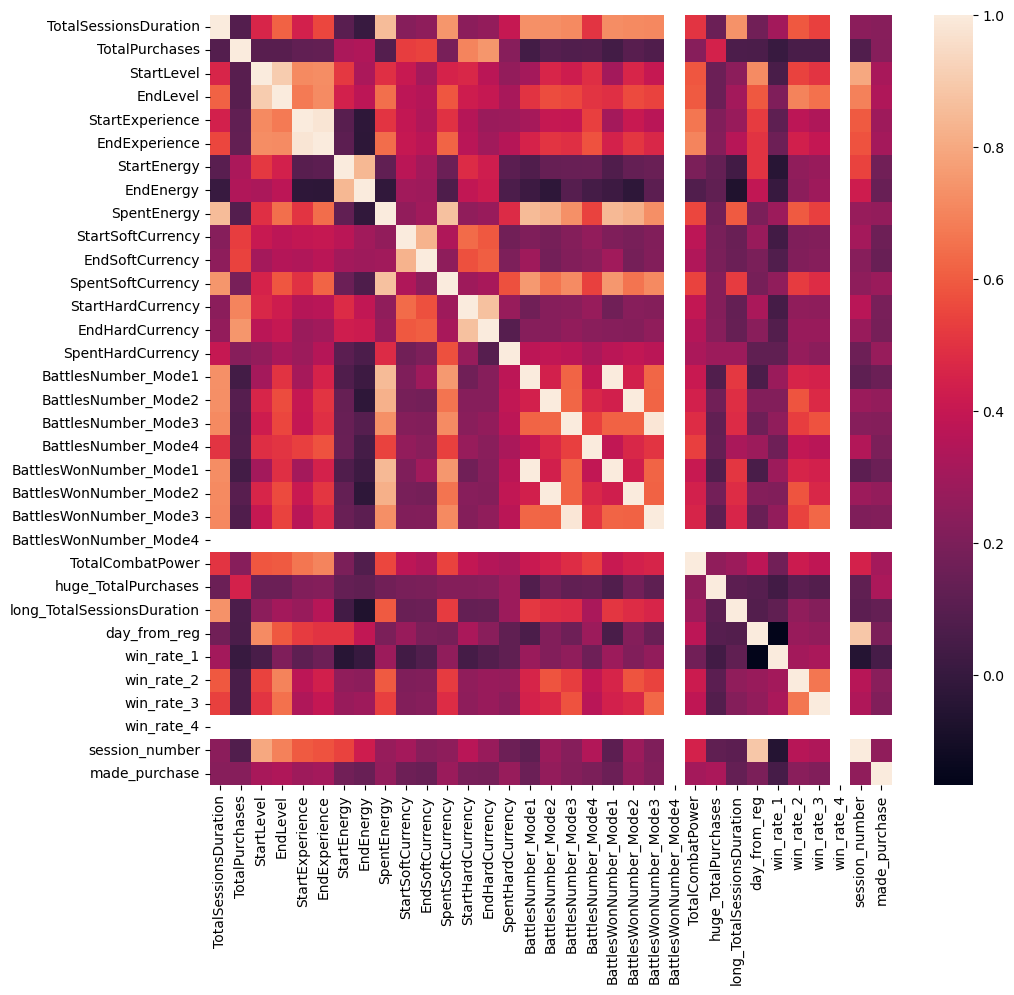

In [26]:
# to visualize correlation matrix use heatmap
cor = df.corr()
plt.figure(figsize = (11,10)) 
sns.heatmap(cor, annot = False) 
plt.show()

From the heatmap we can see that Total highly correlated with Spent energy  and with first tree mode of the game.
Long sessions are more correlated with spending soft currency than with hard currency. Also long session are more correlated with mode 1 and less and less for 2,3,4 modes.

What is interesting is that total purchases corralated with spending of soft and hard currency. Also with spending Energy.

While big purchases mostly correlated with spending hard currency.

In [429]:
# For visualization of the data distribution and all variants of their paired # skaterplots is under construction pairplot
# df_for_vis = list(df.select_dtypes(include=['int64', 'float64'])) 
# df_for_vis = list[ 'TotalSessionsDuration', 'TotalPurchases',
#        'SpentEnergy', 'SpentSoftCurrency', 'SpentHardCurrency',
#        'day_number', 'day_from_reg', 'win_rate_1', 'win_rate_2', 'win_rate_3',
#        'win_rate_4', 'session_number', 'huge_TotalPurchases',
#        'long_TotalSessionsDuration'] 

# sns.set_context('notebook')
# sns.pairplot(df[df_for_vis], hue='made_purchase',
# hue_order=[1, 0], palette={1:'green', 0:'red'});

<AxesSubplot:xlabel='BattlesNumber_Mode1', ylabel='TotalSessionsDuration'>

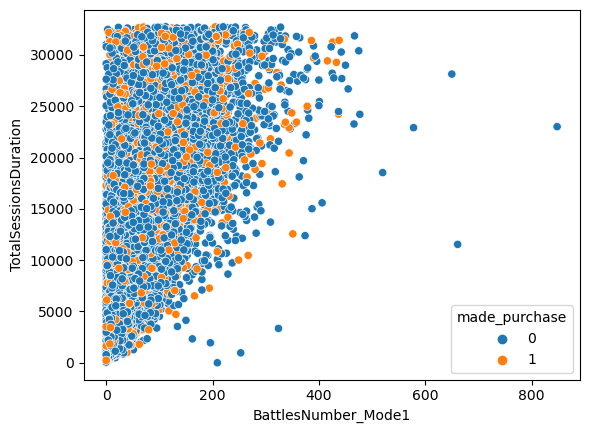

In [33]:
sns.scatterplot(data=df[(df.long_TotalSessionsDuration==0) & (df.huge_TotalPurchases==0) ], x="BattlesNumber_Mode1", y="TotalSessionsDuration", hue = 'made_purchase')

It's hard to split or analyze involving in the battle in mode 1 from the graph above

<AxesSubplot:xlabel='day_from_reg', ylabel='session_number'>

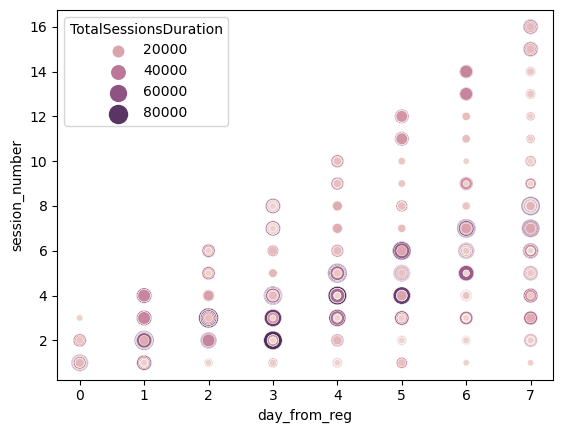

In [40]:
sns.scatterplot(data=df, x="day_from_reg", y="session_number", size = 'TotalSessionsDuration', hue = 'TotalSessionsDuration',sizes=(20, 200))

The interesting graph you can find above.  From graph we can see that there users that have first game in the same day after registration and group of users who have their first session in the next 7 days. Also the highest number of session in the first day is 3 and Duration is not very long, while the next duration is significantly higher. 

<AxesSubplot:xlabel='day_from_reg', ylabel='Count'>

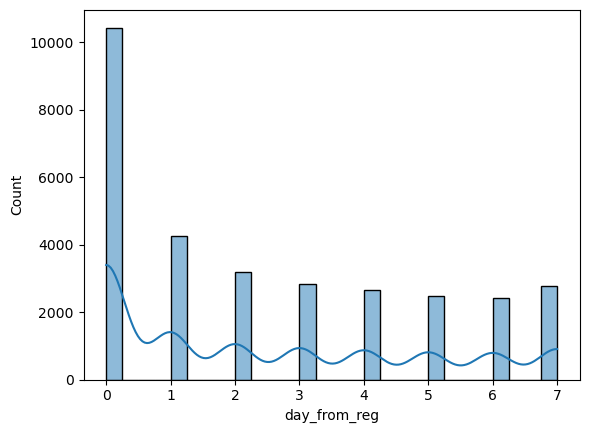

In [41]:
# sns.histplot(data=df, x="session_number", kde=True)
sns.histplot(data=df, x="day_from_reg", kde=True)

On the histogram we can see that almost all our users "check" the game at first day. So it's perfect time to "catch" them:)

<AxesSubplot:xlabel='day_from_reg', ylabel='TotalSessionsDuration'>

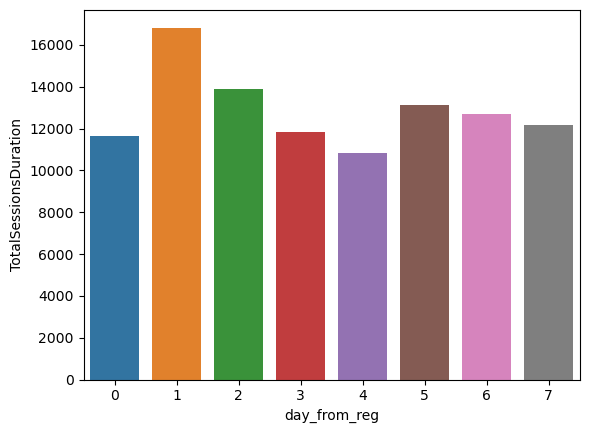

In [43]:
sns.barplot(data=df_days, x="day_from_reg", y="TotalSessionsDuration")


<AxesSubplot:xlabel='day_from_reg', ylabel='TotalPurchases'>

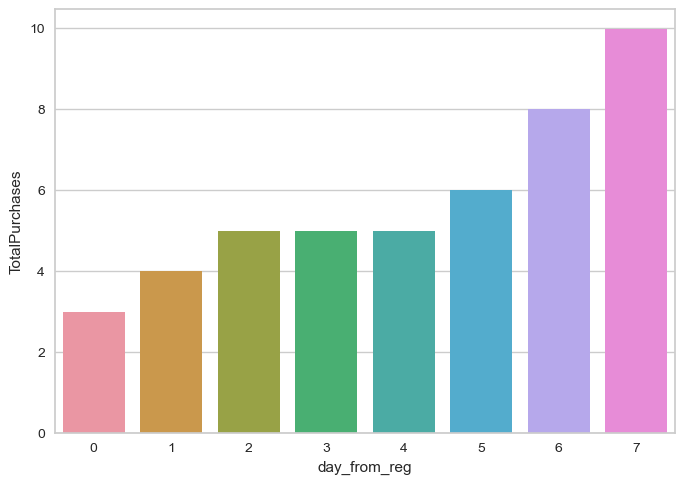

In [434]:
# sns.barplot(data=df_session, x="session_number", y="TotalPurchases")
sns.barplot(data=df_days, x="day_from_reg", y="TotalPurchases")

# df_session

The highest median of the session duration is on the second day from registration. However, the biggest purchases on the 7th.

<AxesSubplot:xlabel='session_number', ylabel='TotalSessionsDuration'>

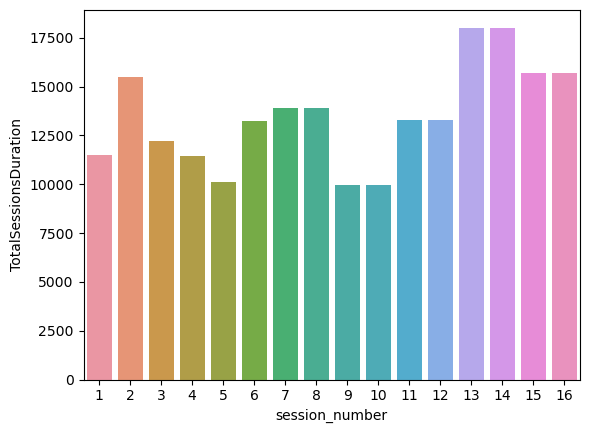

In [46]:
sns.barplot(data=df_session, x="session_number", y="TotalSessionsDuration")

There is no linear dependencies between session number and Total session duration. I would say that there several groups on this graph. the first on - session 1-8 - varies between 12500, then  duration decrases and afte 13th increased.

<AxesSubplot:xlabel='StartLevel', ylabel='EndLevel'>

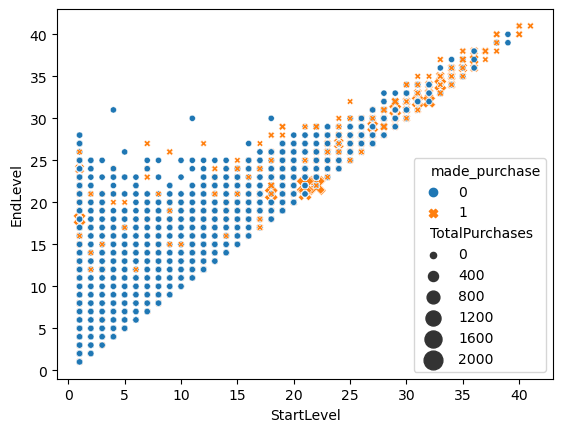

In [55]:
sns.scatterplot(
    data=df, x="StartLevel", y="EndLevel", style="made_purchase",hue = "made_purchase" ,size="TotalPurchases",
    sizes=(20, 200)
)

From the graph above we can find that after 20th level there is less sessions, but more purchases. Before the 20th level a lot of purchases were made in the sessions with big difference between start and end level

## Scaling

In [57]:
#Scaling

scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


## PCA

In [61]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,10558.0,8.437611e-16,5.866597,-3.302777,-3.204787,-2.936427,0.237769,50.756349
col2,10558.0,1.123052e-17,3.211162,-4.142096,-0.259041,0.367176,0.385011,221.816932
col3,10558.0,1.680792e-16,2.105336,-25.275394,-0.796181,-0.715265,0.839304,54.860068


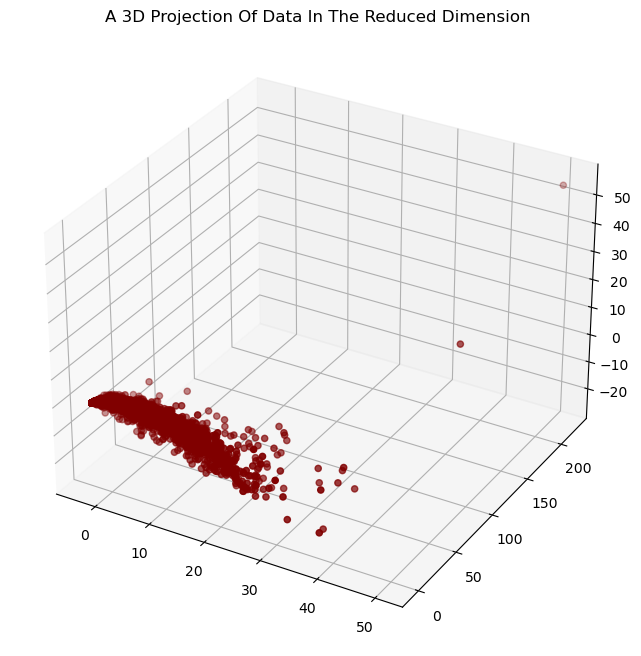

In [62]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Lets start with quick examination of elbow method to find numbers of clusters to make. After that will use Agglomerative Clustering model in order to made customer segmentation

Elbow Method to determine the number of clusters to be formed:


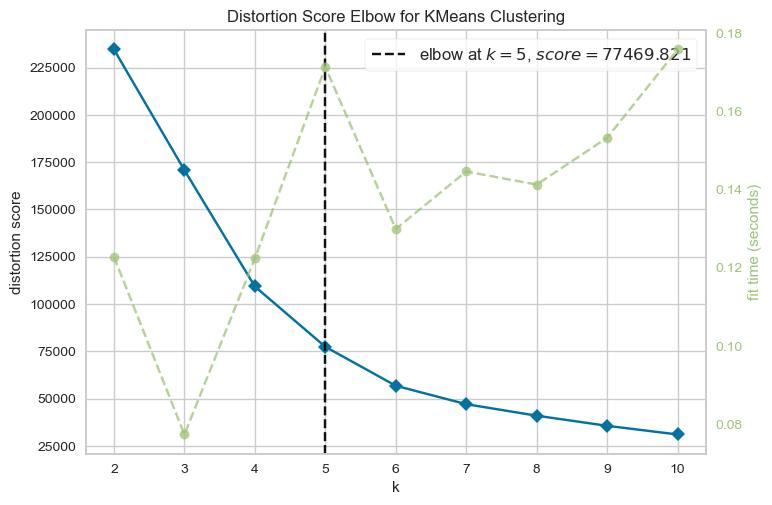

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [68]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

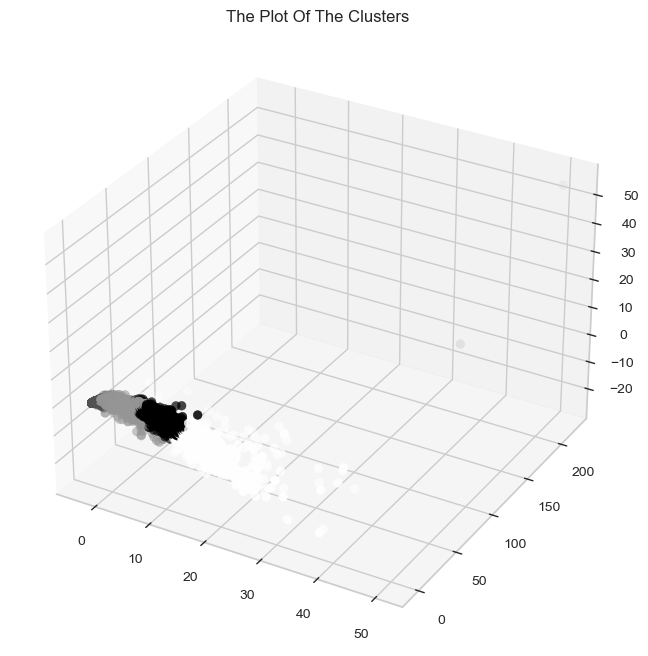

In [89]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

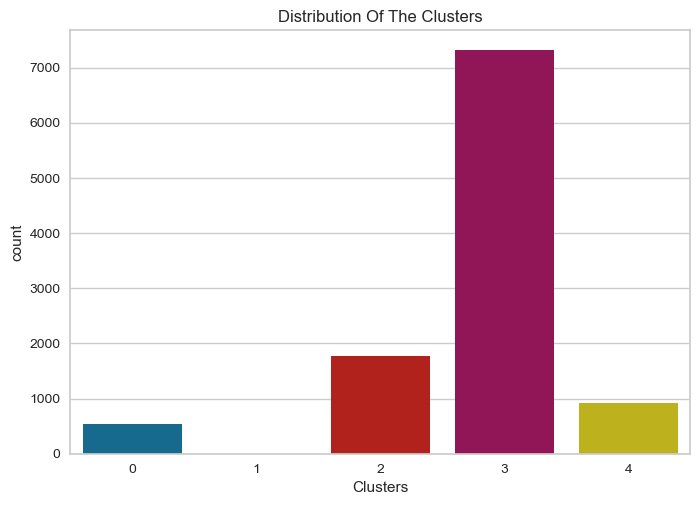

In [70]:
#Plotting countplot of clusters
# pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

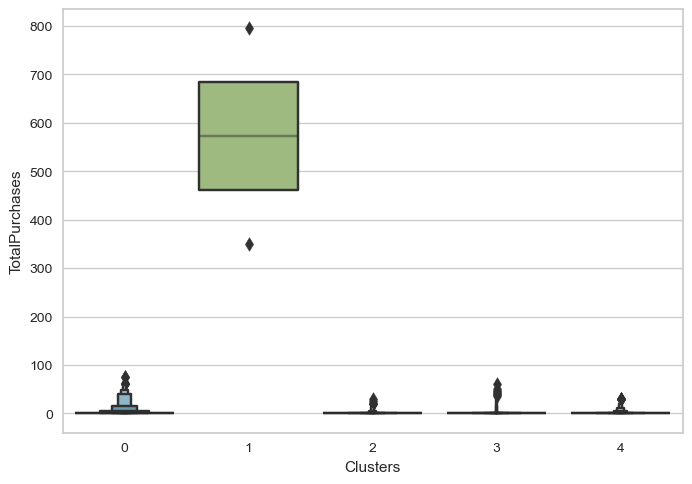

In [71]:
plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["TotalPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["TotalPurchases"])
plt.show()

From graphs above and statistics below we can see that cluster 1 have only 2 users with extremly hight TotalSessionsDuration and TotalPurchases. It means that in future research it will be better to split our "outliers" from the main data set and predict their behavior seperatle. In our case I will delete this class from dataset.

In [76]:
data_new = data[data.Clusters !=1] # drop as outliers
data.groupby('Clusters').median()

,TotalSessionsDuration,TotalPurchases,SpentEnergy,SpentSoftCurrency,SpentHardCurrency,win_rate_1,win_rate_2,win_rate_3,win_rate_4,session_number,...,SpentEnergy_7,SpentSoftCurrency_7,SpentHardCurrency_7,win_rate_1_7,win_rate_2_7,win_rate_3_7,win_rate_4_7,session_number_7,huge_TotalPurchases_7,long_TotalSessionsDuration_7
Clusters,,,,,,,,,,,,,,,,,,,,,
0,16884.0,0.00,1092.0,729500.0,0.0,0.99,0.92,0.890,0.0,1.0,...,1942.0,1320440.0,40.0,0.98,0.960,0.77,0.0,1.0,0.0,0.0
1,34598.0,572.33,2423.0,6207965.0,5857.5,1.00,0.93,0.805,0.0,1.0,...,1341.0,892275.0,217.5,0.50,0.495,0.84,0.0,1.0,1.0,0.5
2,5734.0,0.00,220.0,178960.0,0.0,1.00,0.00,0.000,0.0,1.0,...,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,0.0
3,842.0,0.00,8.0,1670.0,0.0,1.00,0.00,0.000,0.0,1.0,...,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,0.0
4,10185.0,0.00,537.0,368810.0,0.0,0.99,0.83,0.830,0.0,1.0,...,690.0,409895.0,0.0,0.96,0.930,0.80,0.0,1.0,0.0,0.0


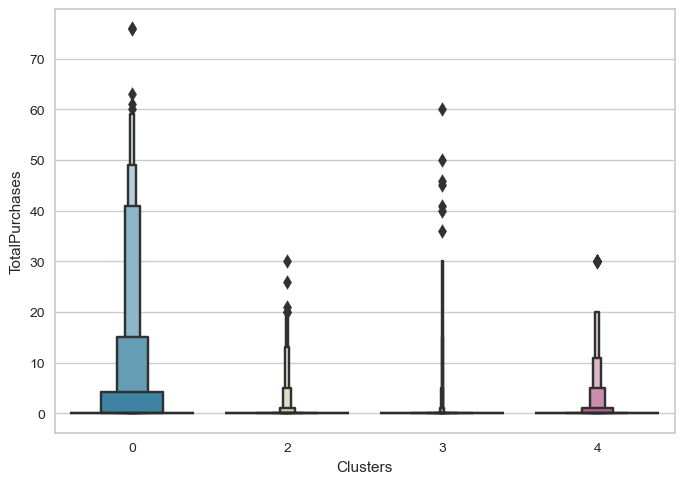

In [77]:
plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["TotalPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_new["Clusters"], y=data_new["TotalPurchases"])
plt.show()


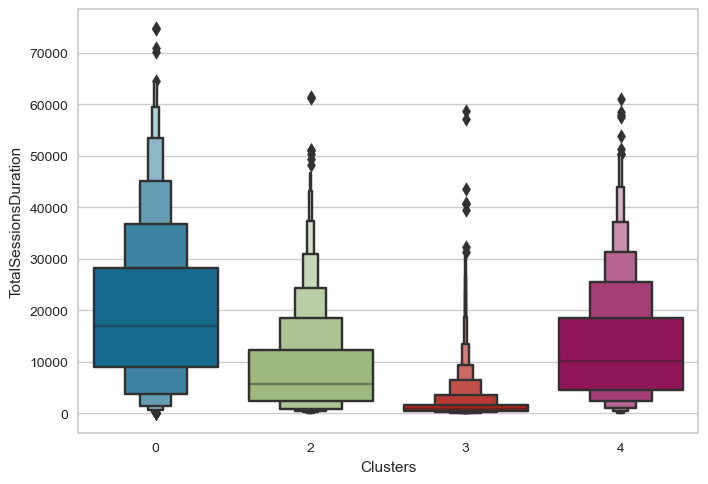

In [78]:
plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["TotalPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_new["Clusters"], y=data_new["TotalSessionsDuration"])
plt.show()

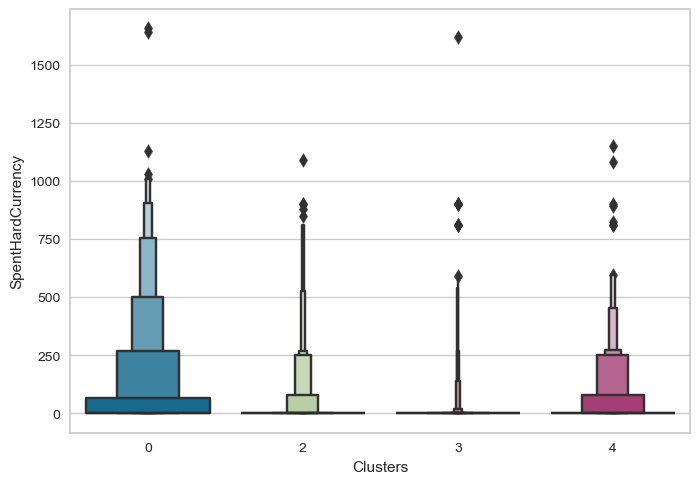

In [79]:
plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["TotalPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_new["Clusters"], y=data_new["SpentHardCurrency"])
plt.show()

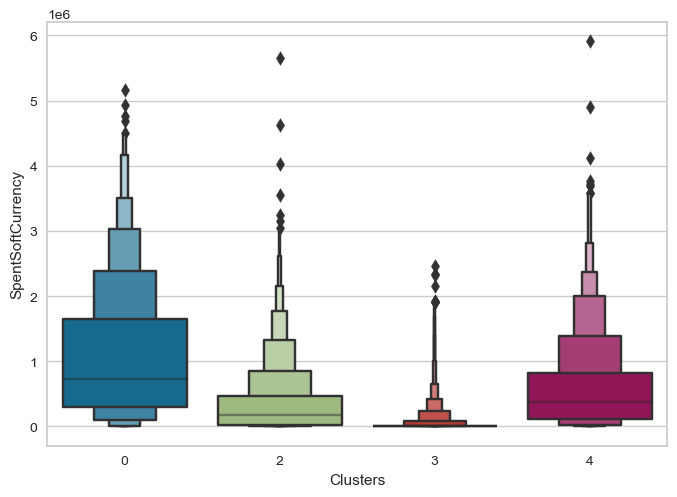

In [80]:
plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["TotalPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_new["Clusters"], y=data_new["SpentSoftCurrency"])
plt.show()

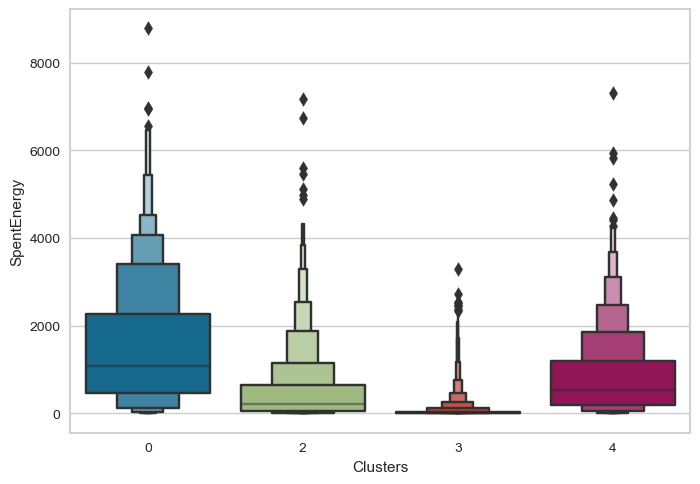

In [82]:
plt.figure()
# pl=sns.swarmplot(x=data["Clusters"], y=data["TotalPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_new["Clusters"], y=data_new["SpentEnergy"])
plt.show()

From the graphs above we can see that groups have different distributions of our main variable. One of the problem is that the users< who are not very involed, have short session duration, no pyrchases are big percentage of the data set ( class 3 - almost 80 %)

# Modeling

## Dealing with imbalanced data 

In [86]:
# Split the data into train and test sets
list_for_cls = [ 'Clusters', 'TotalSessionsDuration', 'TotalPurchases',
       'SpentEnergy', 'SpentSoftCurrency', 'SpentHardCurrency',
       'win_rate_1', 'win_rate_2', 'win_rate_3',
       'win_rate_4', 'session_number', 'huge_TotalPurchases',
       'long_TotalSessionsDuration']
data_cls = data[list_for_cls]
train, test = train_test_split(data_cls, test_size=0.2, random_state=42)

In [90]:


# Count the number of samples in each class
class_counts = train['Clusters'].value_counts()

# Define the target count for each class
target_count = 400

# Undersample the majority class
majority_class = class_counts.index[0]
majority_data = train[train['Clusters'] == majority_class]
undersampled_majority = resample(majority_data,
                                 replace=False,
                                 n_samples=target_count,
                                 random_state=42)

# Oversample the minority classes
minority_classes = class_counts.index[1:]
oversampled_minorities = []
for minority_class in minority_classes:
    minority_data = train[train['Clusters'] == minority_class]
    oversampled_minority = resample(minority_data,
                                     replace=True,
                                     n_samples=target_count,
                                     random_state=42)
    oversampled_minorities.append(oversampled_minority)

# Combine the undersampled majority and oversampled minorities
balanced_data = pd.concat([undersampled_majority] + oversampled_minorities)

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)


In [91]:
balanced_data.groupby('Clusters').count()

,TotalSessionsDuration,TotalPurchases,SpentEnergy,SpentSoftCurrency,SpentHardCurrency,win_rate_1,win_rate_2,win_rate_3,win_rate_4,session_number,huge_TotalPurchases,long_TotalSessionsDuration
Clusters,,,,,,,,,,,,
0,400,400,400,400,400,400,400,400,400,400,400,400
2,400,400,400,400,400,400,400,400,400,400,400,400
3,400,400,400,400,400,400,400,400,400,400,400,400
4,400,400,400,400,400,400,400,400,400,400,400,400


# Random Forest

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming your data is in a variable called 'data' and the target column is called 'Clusters'
X_train = balanced_data.drop(columns=['Clusters'])
y_train = balanced_data['Clusters']

X_test = data_cls.drop(columns=['Clusters'])
y_test = data_cls['Clusters']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object to find the best hyperparameters
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rf_grid.best_params_

# Create a new Random Forest Classifier with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)

# Fit the model to the training data
rf_best.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = rf_best.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.66      0.50       543
           1       0.00      0.00      0.00         2
           2       0.35      0.47      0.40      1779
           3       0.93      0.71      0.80      7312
           4       0.31      0.56      0.40       922

    accuracy                           0.65     10558
   macro avg       0.40      0.48      0.42     10558
weighted avg       0.75      0.65      0.68     10558



/Users/yelyzaveta.yaroshchuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yelyzaveta.yaroshchuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yelyzaveta.yaroshchuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In this report, the precision for class 0 is 0.40, meaning that out of all the samples predicted to belong to class 0, only 40% of them were actually from class 0.

The recall for class 0 is 0.66, meaning that out of all the samples that belong to class 0, the model was able to correctly identify 66% of them.

The macro average F1-score is 0.42, which is low and indicates poor overall performance of the model. The weighted average F1-score is 0.68, which is slightly better and takes into account the class imbalance.

In summary, the model's performance is not satisfactory, especially for classes 1 and 4, where precision and recall are both very low. This indicates that the model is not able to correctly classify samples from these classes. Further analysis and improvement of the model are needed.

For the futher analisys I would reccomend to split users by who are making big purchases and those who have long sessions in the game as a seperate cluster in the beginning. Then split those who are made at lest one purchase and who didn't. So we can fix data imbalancing and, I believe this two groups have different pattern of begavior and need different marketing approaches. Thus, after preprocessing we would already have 3 clusters.

In this research I used outlier Agglomerative Clustering model and Random Forest, but of course, the different ML algorithms can be used as DBSCAN clustering, K-means and Logistic Classidier,  DNN.

Also RFM Segmentation approach  can be used for customer segmentation. The example you can find  by the link below.

In [470]:
# https://towardsdatascience.com/rfm-segmentation-using-quartiles-and-jenks-natural-breaks-924f4d8baee1